<a href="https://colab.research.google.com/github/ilirsheraj/DUDL/blob/main/Chapter_07_Metaparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the necessary libraries
## DL Modeling
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

## Numerical Analysis
import numpy as np
import scipy.stats as stats

## Dataset Management
import pandas as pd

## Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## High-Quality Figures
from IPython import display
display.set_matplotlib_formats("svg")

# Wine Quality Dataset

In [2]:
# Download the data from original database
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

data = pd.read_csv(url, sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
# Summarize the data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
# List the number of unique values per column
for i in data.keys():
    print("{} has {} unique values".format(i, len(np.unique(data[i]))))

fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values


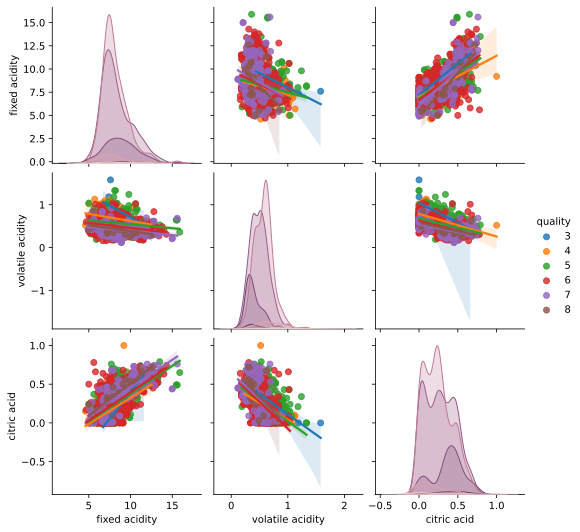

In [10]:
# Pairwise plots
cols2plot = ["fixed acidity", "volatile acidity", "citric acid", "quality"]
sns.pairplot(data[cols2plot], kind="reg", hue ="quality")
plt.show()

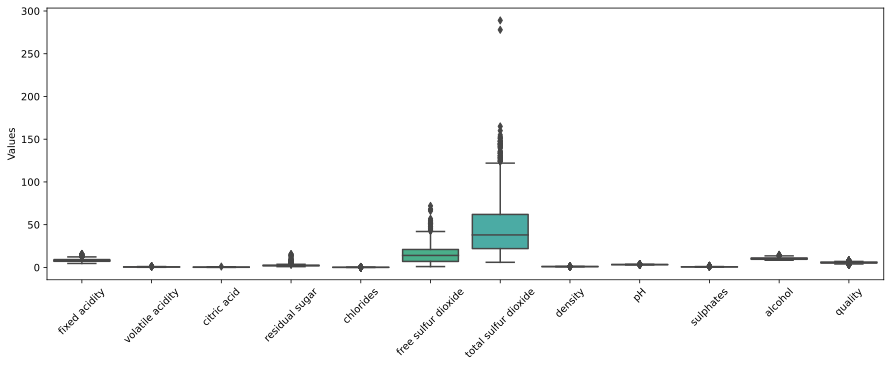

In [13]:
# Use boxplots
fig, ax = plt.subplots(1, figsize=(15,5))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Values")
plt.show()

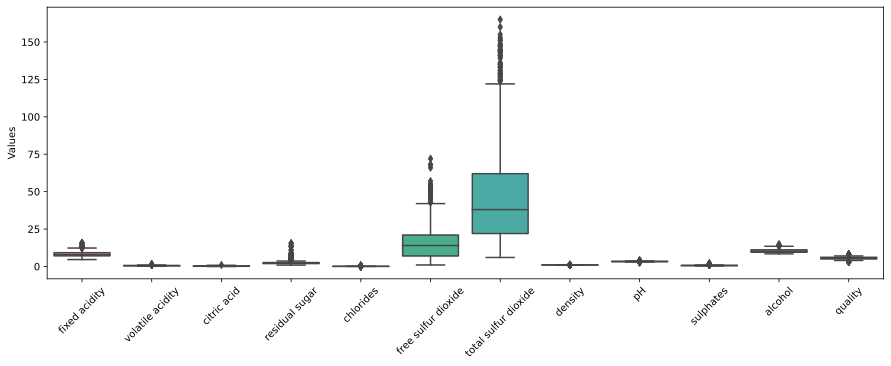

In [15]:
# Let's remove rows with very big outliers
fig, ax = plt.subplots(1, figsize=(15,5))
ax = sns.boxplot(data = data[data["total sulfur dioxide"] < 200])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Values")
plt.show()

In [7]:
# Reassign the data with the two outliers removed completely
data = data[data["total sulfur dioxide"] < 200]

# Z-Score all variables except quality
# Find the columns we want to normalize (all except quality)

cols2zscore = data.keys()
cols2zscore = cols2zscore.drop("quality")

# Long way
for col in cols2zscore:
    meanval = np.mean(data[col])
    stdev = np.std(data[col], ddof=1)
    data[col] = (data[col] - meanval)/stdev

# Can be done in a single shot
# data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1.597000e+03,1597.000000
mean,-1.652668e-14,-1.793320e-15,5.880498e-15,-9.376066e-16,5.098127e-15,6.366229e-17,-1.349022e-16,4.467943e-13,-2.419966e-15,-1.921236e-15,2.247267e-14,5.634314
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.806630
min,-2.135419e+00,-2.280048e+00,-1.391387e+00,-1.168783e+00,-1.604073e+00,-1.422392e+00,-1.262186e+00,-3.545821e+00,-3.708218e+00,-1.936711e+00,-1.898626e+00,3.000000
25%,-7.003882e-01,-7.715838e-01,-9.283861e-01,-4.524372e-01,-3.720247e-01,-8.476045e-01,-7.594598e-01,-6.109478e-01,-6.585382e-01,-6.390204e-01,-8.650444e-01,5.000000
50%,-2.411785e-01,-4.528645e-02,-5.382836e-02,-2.375335e-01,-1.808448e-01,-1.770192e-01,-2.567340e-01,-6.214425e-04,-9.670044e-03,-2.261189e-01,-2.073106e-01,6.000000
75%,5.050372e-01,6.251419e-01,7.692848e-01,4.900487e-02,5.281955e-02,4.935662e-01,4.973546e-01,5.778618e-01,5.743113e-01,4.227263e-01,6.383472e-01,6.000000
max,4.350918e+00,5.876831e+00,3.753070e+00,9.289866e+00,1.112001e+01,5.379259e+00,3.733652e+00,3.682565e+00,4.532407e+00,7.913939e+00,4.208902e+00,8.000000


In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528185,0.960356,-1.391387,-0.452437,-0.244571,-0.464413,-0.382415,0.556633,1.288066,-0.580034,-0.959006,5
1,-0.298580,1.965999,-1.391387,0.049005,0.222757,0.876758,0.654456,0.025914,-0.723425,0.127797,-0.583159,5
2,-0.298580,1.295570,-1.185609,-0.165899,0.095304,-0.081221,0.245992,0.132058,-0.334104,-0.049161,-0.583159,5
3,1.653061,-1.386143,1.489509,-0.452437,-0.265814,0.110375,0.434514,0.662777,-0.982972,-0.462063,-0.583159,6
4,-0.528185,0.960356,-1.391387,-0.452437,-0.244571,-0.464413,-0.382415,0.556633,1.288066,-0.580034,-0.959006,5


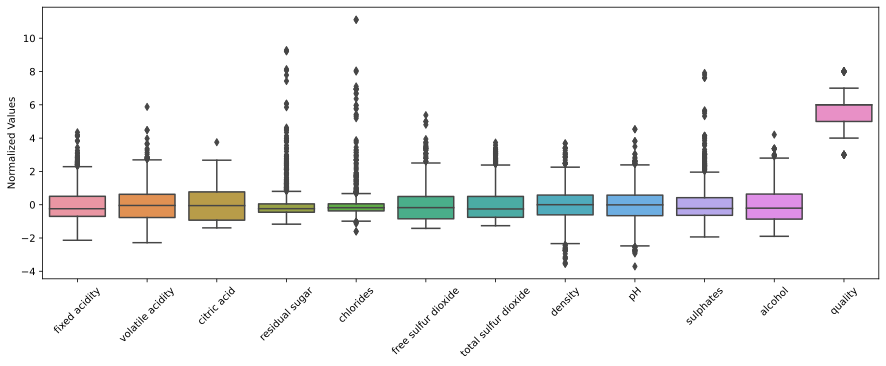

In [18]:
# Plot again
fig, ax = plt.subplots(1, figsize=(15,5))
ax = sns.boxplot(data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_ylabel("Normalized Values")
plt.show()

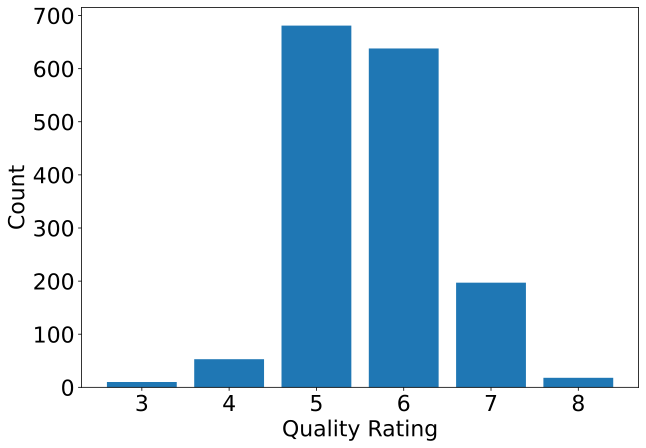

In [20]:
# Lets check the distribution of quality values
fig = plt.figure(figsize=(10,7))
# Increase the fontsize in the figure
plt.rcParams.update({"font.size": 22})

counts = data["quality"].value_counts()
plt.bar(list(counts.keys()), counts)
plt.xlabel("Quality Rating")
plt.ylabel("Count")
plt.show()

In [9]:
# The data is very imbalanced, and for DL this is a big problem
# We will threshold the quality and binarize it to low and high quality wine
# Create a new column for binarized (boolean) wine quality
data["boolQuality"] = 0
data["boolQuality"][data["quality"] > 5] = 1
data[["quality", "boolQuality"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,quality,boolQuality
0,5,0
1,5,0
2,5,0
3,6,1
4,5,0
...,...,...
1594,5,0
1595,6,1
1596,6,1
1597,5,0


In [10]:
# Convert the data into tensors
dataT = torch.tensor(data[cols2zscore].values).float()
labels = torch.tensor(data["boolQuality"].values).float()

print(dataT.shape)
print(labels.shape)

# We need the labels to be tensor
labels = labels[:,None]
print(labels.shape)

torch.Size([1597, 11])
torch.Size([1597])
torch.Size([1597, 1])


In [11]:
# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labels, test_size = 0.1)

# Convert to Pytorch datasets
train_data = TensorDataset(train_data, train_labels)
test_data = TensorDataset(test_data, test_labels)

# Translate to dataloader objects
batchsize = 64
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [12]:
# Check the sizes of batches
for X,y in train_loader:
    print(X.shape, y.shape)

torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])
torch.Size([64, 11]) torch.Size([64, 1])


# Minibatch Size Effect

In [13]:
import time
import torch.nn as nn
import torch.nn.functional as F

In [14]:
# We will use the data processed above
# Define the model Class
class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()

        # Input layer
        self.input = nn.Linear(11,16)

        # Define two hidden layers
        self.fc1 = nn.Linear(16,32) # fc = fully connected
        self.fc2 = nn.Linear(32,32)

        # Define the output layer
        self.output = nn.Linear(32,1)

    # Forwad Pass
    def forward(self,x):
        x = F.relu(self.input(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        return self.output(x)

In [15]:
# Time to train
numepochs = 1000

def trainTheModel():

    # Loss function and optimizer
    lossfun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(winenet.parameters(), lr = 0.01)

    # Initialize the losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # Loop over the epochs
    for epochi in range(numepochs):

        # switch on he training mode
        winenet.train()

        # Loop over the training data batches
        batchAcc = []
        batchLoss = []

        for X,y in train_loader:

            # Forward pass and loss
            yHat = winenet(X)
            loss = lossfun(yHat,y)

            # Backpropagation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from single batch
            batchLoss.append(loss.item())

            # Training Accuracy for single batch
            batchAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
        # End of the batch loop
        # Average training accuracy for batches in this epoch
        trainAcc.append(np.mean(batchAcc))

        # Average losses accross the baches
        losses[epochi] = np.mean(batchLoss)

        # test the accuracy
        winenet.eval()
        # Extract X and y from dataloader
        X,y = next(iter(test_loader))
        # deactivate autograd
        with torch.no_grad():
            yHat = winenet(X)
        testAcc.append(100*torch.mean(((yHat>0)==y).float()).item())
    # Final output
    return trainAcc, testAcc, losses

In [46]:
# Range the batch sizes
batchsizes = 2**np.arange(1,10,2)

# Initialize the output result matrices
accuracyResultsTrain = np.zeros((numepochs, len(batchsizes)))
accuracyResultsTest = np.zeros((numepochs, len(batchsizes)))

# Computational time
comptime = np.zeros(len(batchsizes))

test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

# Loop over the batch sizes
for bi in range(len(batchsizes)):
    # Start the timer
    starttime = time.process_time()

    # Create train loadr object for each iteration
    train_loader = DataLoader(train_data, batch_size=int(batchsizes[bi]), shuffle=True, drop_last=True)

    # Create and train a model
    winenet = ANNwine()
    trainAcc, testAcc, losses = trainTheModel()

    # Store the data
    accuracyResultsTrain[:,bi] = trainAcc
    accuracyResultsTest[:,bi] = testAcc

    # Computation time
    comptime[bi] = time.process_time() - starttime

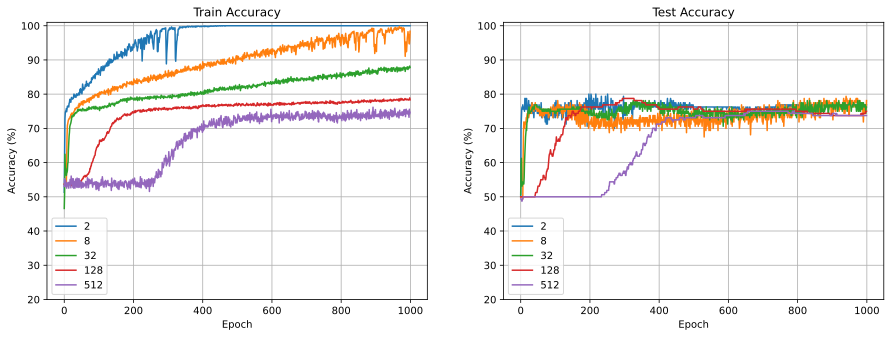

In [50]:
# Reset matplotlib rcparameters
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Plot the results
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(accuracyResultsTrain)
ax[0].set_title("Train Accuracy")
ax[1].plot(accuracyResultsTest)
ax[1].set_title("Test Accuracy")

# Common features
for i in range(2):
    ax[i].legend(batchsizes)
    ax[i].set_xlabel("Epoch")
    ax[i].set_ylabel("Accuracy (%)")
    ax[i].set_ylim([20,101])
    ax[i].grid()

plt.show()
# It seems like the model is memorizing the data points, especially for small batches!

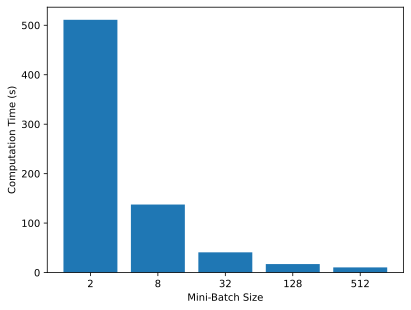

In [51]:
# Bar plot of computation time
plt.bar(range(len(comptime)), comptime, tick_label=batchsizes)
plt.xlabel("Mini-Batch Size")
plt.ylabel("Computation Time (s)")
plt.show()

# Importance of Data Normalization

## The Iris Dataset (Previous Chapter)

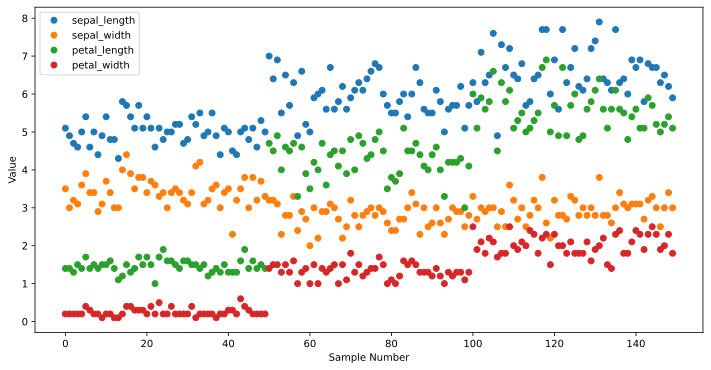

In [19]:
# Import and convert iris dataset
import seaborn as sns
iris = sns.load_dataset("iris")

# Visualize data range
iris.plot(marker="o", linestyle="none", figsize=(12,6))
plt.xlabel("Sample Number")
plt.ylabel("Value")
plt.show()
# The ranges of data is quite colse

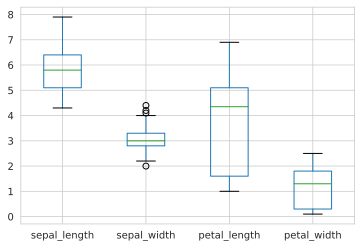

In [24]:
# Use boxplot to confirm
boxplot = iris.boxplot()

In [ ]:
# Normalize the features
import scipy.stats as stats
cols2zscore = iris.keys()
cols2zscore = cols2zscore.drop("species")
iris[cols2zscore] = iris[cols2zscore].apply

In [ ]:



#Transform to Torch
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# Tranform species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species=="setosa"] = 0
labels[iris.species=="versicolor"] = 1
labels[iris.species=="virginica"] = 2
labels

In [ ]:
# Split the data into train-test and convert to dataloader
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

# Convert to PyTorch datasets
train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

# Translate into data loaders
batchsize = 16
train_loader = DataLoader(train_data, batch_size=batchsize, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])

In [52]:
# Run the same analysis, but without normalizing the data


0.39622641509433965